In [1]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyarrow

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import os
import dask.dataframe as dd
import datetime as dt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_cct = pd.read_parquet("/Users/vanheuverswyn/Downloads/cct_var_new.parquet")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/vanheuverswyn/Downloads/cct_var_new.parquet'

In [ ]:
df_cct

User  Card       date           timestamp  Amount  \
0            0     0 2002-09-01 2002-09-01 06:21:00  134.09   
1            0     0 2002-09-01 2002-09-01 06:42:00   38.48   
2            0     0 2002-09-02 2002-09-02 06:22:00  120.34   
3            0     0 2002-09-02 2002-09-02 17:45:00  128.95   
4            0     0 2002-09-03 2002-09-03 06:23:00  104.71   
...        ...   ...        ...                 ...     ...   
24386895  1999     1 2020-02-27 2020-02-27 22:23:00  -54.00   
24386896  1999     1 2020-02-27 2020-02-27 22:24:00   54.00   
24386897  1999     1 2020-02-28 2020-02-28 07:43:00   59.15   
24386898  1999     1 2020-02-28 2020-02-28 20:10:00   43.12   
24386899  1999     1 2020-02-28 2020-02-28 23:10:00   45.13   

                   Use Chip        Merchant Name  Merchant City  \
0         Swipe Transaction  3527213246127876953       La Verne   
1         Swipe Transaction  -727612092139916043  Monterey Park   
2         Swipe Transaction  -727612092139916043  Monterey Park   
3         Swipe Transaction  3414527459579106770  Monterey Park   
4         Swipe Transaction  5817218446178736267       La Verne   
...                     ...                  ...            ...   
24386895   Chip Transaction -5162038175624867091      Merrimack   
24386896   Chip Transaction -5162038175624867091      Merrimack   
24386897   Chip Transaction  2500998799892805156      Merrimack   
24386898   Chip Transaction  2500998799892805156      Merrimack   
24386899   Chip Transaction  4751695835751691036      Merrimack   

         Merchant State      Zip  ...  wk_med_amt wk_i_med_amt  \
0                    CA  91750.0  ...     1380.96       90.015   
1                    CA  91754.0  ...     1380.96       90.015   
2                    CA  91754.0  ...     1380.96       90.015   
3                    CA  91754.0  ...     1380.96       90.015   
4                    CA  91750.0  ...     1380.96       90.015   
...                 ...      ...  ...         ...          ...   
24386895             NH   3054.0  ...     1859.19       54.000   
24386896             NH   3054.0  ...     1859.19       54.000   
24386897             NH   3054.0  ...     1852.71       45.130   
24386898             NH   3054.0  ...     1852.71       45.130   
24386899             NH   3054.0  ...     1852.71       45.130   

          nbt_wk_i/amt_wk_i  amt/day_income  merchant_user_state_is_diff  \
0                  0.177748        0.819868                            0   
1                  0.177748        0.235279                            0   
2                  0.177748        0.735796                            0   
3                  0.177748        0.788441                            0   
4                  0.177748        0.640230                            0   
...                     ...             ...                          ...   
24386895           0.722222       -0.299049                            0   
24386896           0.722222        0.299049                            0   
24386897           0.066475        0.327569                            0   
24386898           0.066475        0.238796                            0   
24386899           0.066475        0.249927                            0   

          rolling_nb_frauds_wk  rolling_nbt_wk  rolling_amt_wk  \
0                          0.0             1.0          134.09   
1                          0.0             2.0          172.57   
2                          0.0             3.0          292.91   
3                          0.0             4.0          421.86   
4                          0.0             5.0          526.57   
...                        ...             ...             ...   
24386895                   0.0            38.0         1939.11   
24386896                   0.0            39.0         1993.11   
24386897                   0.0            31.0         1610.29   
24386898                   0.0            32.0         1653.41   
24386899        

In [7]:
df_cct.columns

Index(['User', 'Card', 'date', 'timestamp', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'delta_t_s', 'delta_t_s_card', 'day_amt',
       'day_nbt', 'day_med_nbt', 'wk_i_nbt', 'wk_med_nbt', 'wk_i_amt',
       'wk_med_amt', 'wk_i_med_amt', 'nbt_wk_i/amt_wk_i', 'amt/day_income',
       'merchant_user_state_is_diff', 'rolling_nb_frauds_wk', 'rolling_nbt_wk',
       'rolling_amt_wk', 'rolling_amt_med_wk', 'rolling_nbt_wk/amt_wk'],
      dtype='object')

In [8]:
column_list=['User', 'Card', 'date', 'timestamp', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'delta_t_s', 'delta_t_s_card', 'day_amt',
       'day_nbt', 'day_med_nbt', 'wk_i_nbt', 'wk_med_nbt', 'wk_i_amt',
       'wk_med_amt', 'wk_i_med_amt', 'nbt_wk_i/amt_wk_i', 'amt/day_income',
       'merchant_user_state_is_diff', 'rolling_nb_frauds_wk', 'rolling_nbt_wk',
       'rolling_amt_wk', 'rolling_amt_med_wk', 'rolling_nbt_wk/amt_wk']

In [7]:
new_var_list=['delta_t_s', 'delta_t_s_card', 'day_amt',
       'day_nbt', 'day_med_nbt', 'wk_i_nbt', 'wk_med_nbt', 'wk_i_amt',
       'wk_med_amt', 'wk_i_med_amt', 'nbt_wk_i/amt_wk_i', 'amt/day_income', 'rolling_nb_frauds_wk', 'rolling_nbt_wk',
       'rolling_amt_wk', 'rolling_amt_med_wk', 'rolling_nbt_wk/amt_wk']

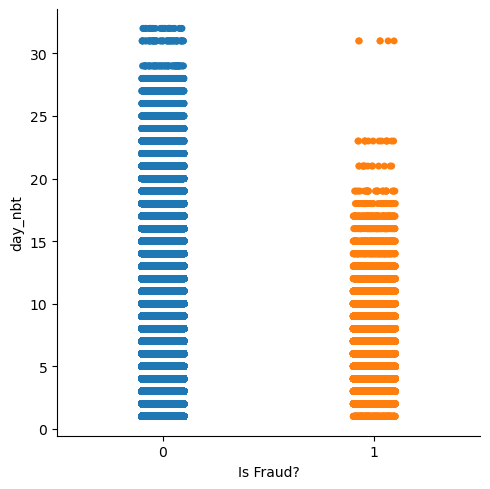

In [10]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'day_nbt')
plt.show()

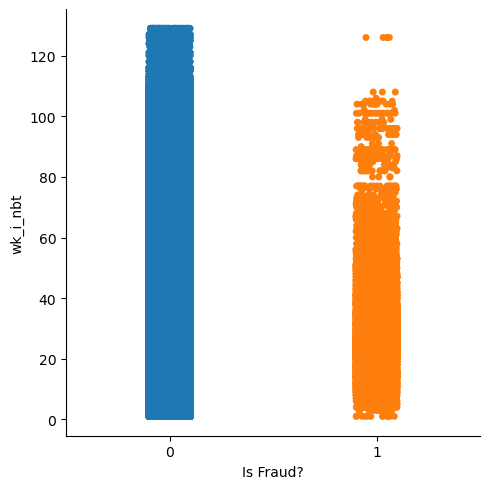

In [11]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'wk_i_nbt')
plt.show()

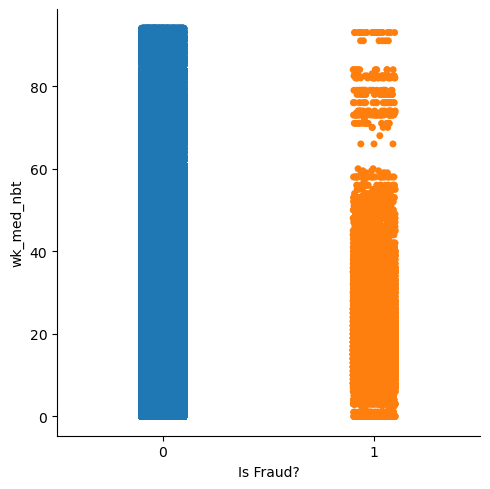

In [12]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'wk_med_nbt')
plt.show()

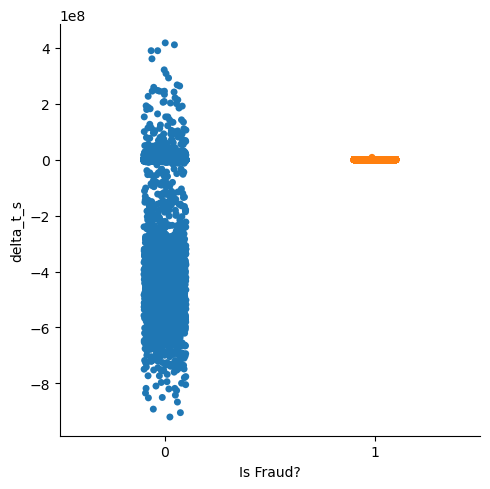

In [13]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'delta_t_s')
plt.show()

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'delta_t_s')
plt.show()

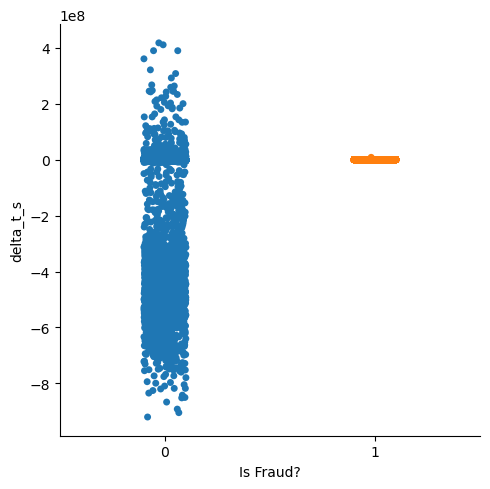

In [13]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'delta_t_s')
plt.show()

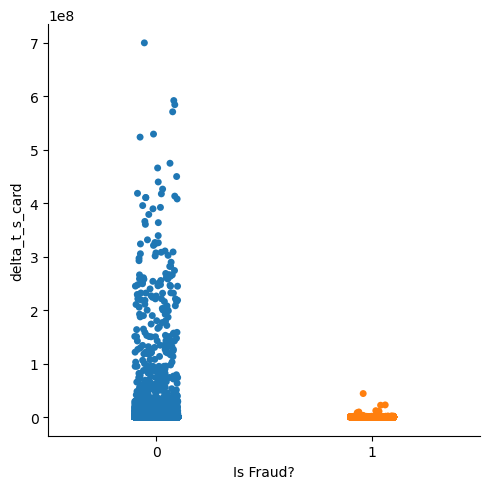

In [14]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'delta_t_s_card')
plt.show()

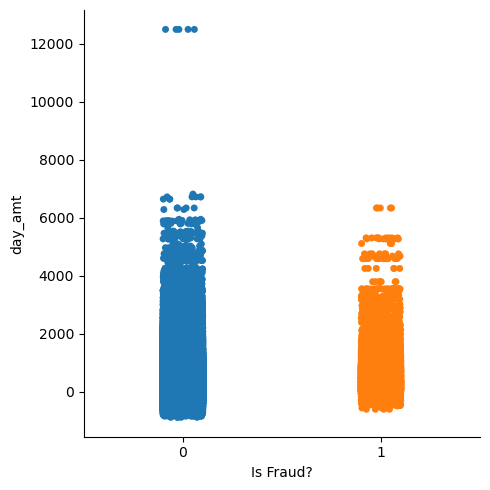

In [15]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'day_amt')
plt.show()

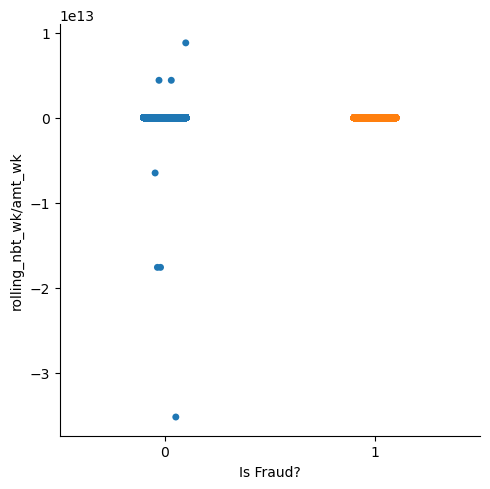

In [11]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'rolling_nbt_wk/amt_wk')
plt.show()

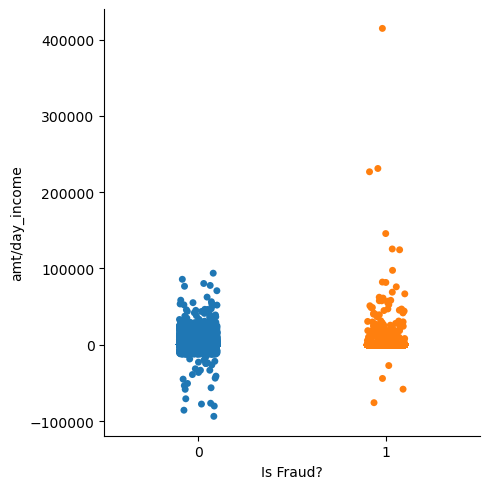

In [16]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'amt/day_income')
plt.show()

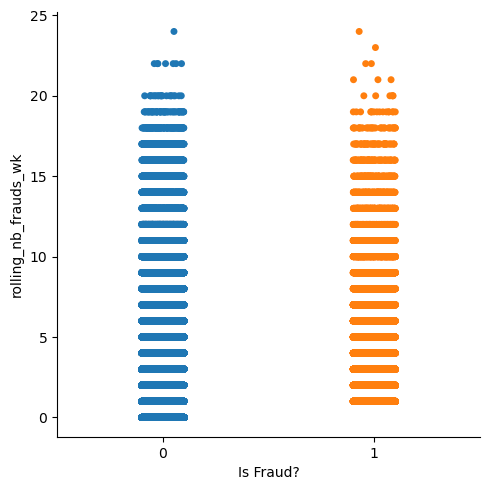

In [15]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'rolling_nb_frauds_wk')
plt.show()

In [28]:
df = df_cct[df_cct["merchant_user_state_is_diff"]==0]
nb_fraud = df['Is Fraud?'].value_counts()
nb_transaction = df.shape[0]

In [29]:
nb_fraud

0    24357143
1       29757
Name: Is Fraud?, dtype: int64

In [34]:
df = df_cct[df_cct["merchant_user_state_is_diff"]==1]
nb_fraud = df['Is Fraud?'].value_counts()

In [8]:
import plotly.express as px
df=df_cct[new_var_list]

fig = px.imshow(df.corr())
fig.show()

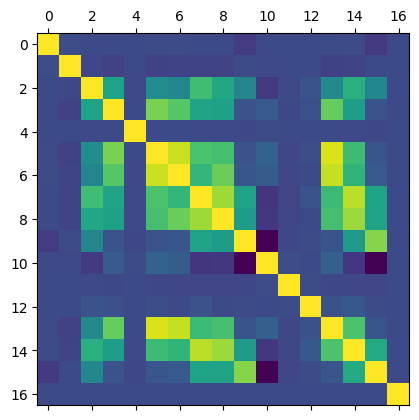

In [14]:
df=df_cct[new_var_list]
plt.matshow(df.corr())
plt.show()

In [17]:
df_cct["amt/day_income"].describe()

count    2.438690e+07
mean     3.777786e+00
std      2.248057e+02
min     -9.380500e+04
25%      7.768670e-02
50%      2.569882e-01
75%      5.751941e-01
max      4.146108e+05
Name: amt/day_income, dtype: float64

In [42]:
df_cct = pd.read_parquet("/Users/vanheuverswyn/Downloads/df_cct_final.parquet")


In [34]:
df_cct

User  Card  Month  Day day_of_week  Hours  Amount  \
0            0     0      9    1      Sunday      6  134.09   
1            0     0      9    1      Sunday      6   38.48   
2            0     0      9    2      Monday      6  120.34   
3            0     0      9    2      Monday     17  128.95   
4            0     0      9    3     Tuesday      6  104.71   
...        ...   ...    ...  ...         ...    ...     ...   
24386895  1999     1      2   27    Thursday     22  -54.00   
24386896  1999     1      2   27    Thursday     22   54.00   
24386897  1999     1      2   28      Friday      7   59.15   
24386898  1999     1      2   28      Friday     20   43.12   
24386899  1999     1      2   28      Friday     23   45.13   

                   Use Chip        Merchant Name  Merchant City  ... Retired  \
0         Swipe Transaction  3527213246127876953       La Verne  ...       0   
1         Swipe Transaction  -727612092139916043  Monterey Park  ...       0   
2         Swipe Transaction  -727612092139916043  Monterey Park  ...       0   
3         Swipe Transaction  3414527459579106770  Monterey Park  ...       0   
4         Swipe Transaction  5817218446178736267       La Verne  ...       0   
...                     ...                  ...            ...  ...     ...   
24386895   Chip Transaction -5162038175624867091      Merrimack  ...       0   
24386896   Chip Transaction -5162038175624867091      Merrimack  ...       0   
24386897   Chip Transaction  2500998799892805156      Merrimack  ...       0   
24386898   Chip Transaction  2500998799892805156      Merrimack  ...       0   
24386899   Chip Transaction  4751695835751691036      Merrimack  ...       0   

          daily_amount  nb_daily_declines_card  bad_pin  insufficient_balance  \
0               134.09                     0.0        0                     0   
1               172.57                     0.0        0                     0   
2               120.34                     0.0        0                     0   
3               249.29                     0.0        0                     0   
4               104.71                     0.0        0                     0   
...                ...                     ...      ...                   ...   
24386895        369.71                     0.0        0                     0   
24386896        423.71                     0.0        0                     0   
24386897         59.15                     0.0        0                     0   
24386898        102.27                     0.0        0                     0   
24386899        147.40                     0.0        0                     0   

          hr_nbt/last_30d_av_hr_nbt  last_18h_nbt  last_18h_amt  \
0                          1.000000           1.0        134.09   
1                          1.333333           2.0        172.57   
2                          0.750000           1.0        120.34   
3                          0.800000           2.0        249.29   
4                          0.833333           2.0        233.66   
...                             ...           ...           ...   
24386895                   1.610738           7.0        369.71   
24386896                   2.388158           8.0        423.71   
24386897                   0.796053           6.0        302.77   
24386898                   0.794702           2.0        102.27   
24386899                   0.796053           3.0        147.40   

          last_3d_amt/nbt  Is Fraud?  
0              134.090000          0  
1               86.285000          0  
2               97.636667          0  
3              105.465000          0  
4              105.314000          0  
...                   ...        ...  
24386895        62.315294          0  
24386896        61.853333          0  
24386897        52.769286          0  
24386898        52.126000          0  
24386899        51.688750          0  

[24386900 rows x 25 columns]

In [32]:
df_cct.columns

Index(['User', 'Card', 'Month', 'Day', 'day_of_week', 'Hours', 'Amount',
       'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired',
       'daily_amount', 'nb_daily_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_18h_nbt',
       'last_18h_amt', 'last_3d_amt/nbt', 'Is Fraud?'],
      dtype='object')

In [20]:


fig = px.imshow(df_cct.corr())
fig.show()

In [62]:
new_var_list=['User', 'Card', 'Month', 'Day', 'day_of_week', 'Hours', 'Amount', 'Merchant City','Merchant State','delta_t_s', 'delta_t_s_card', 'amt/daily_income', 'Retired','daily_amount', 'nb_daily_declines_card', 'bad_pin','insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt', 'last_3d_amt/nbt', 'Is Fraud?']
df=df_cct[new_var_list]

fig = px.imshow(df.corr())
fig.show()
        
        
        
        
        

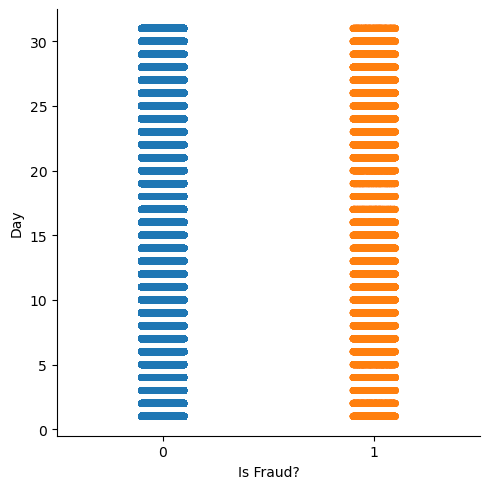

In [21]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'Day')
plt.show()

In [ ]:
df_cct['day_of_week','']

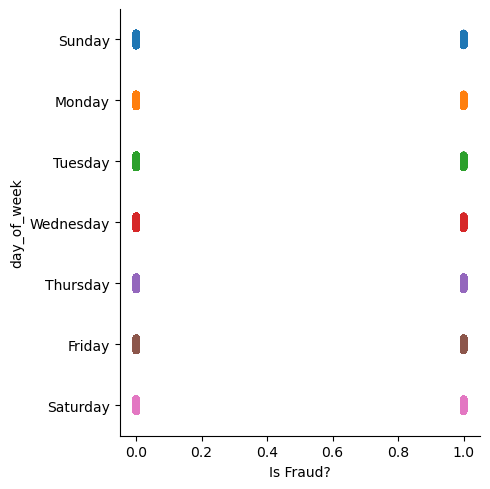

In [22]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'day_of_week')
plt.show()

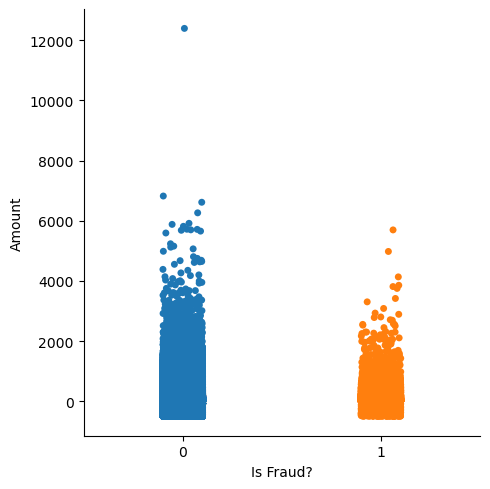

In [23]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'Amount')
plt.show()

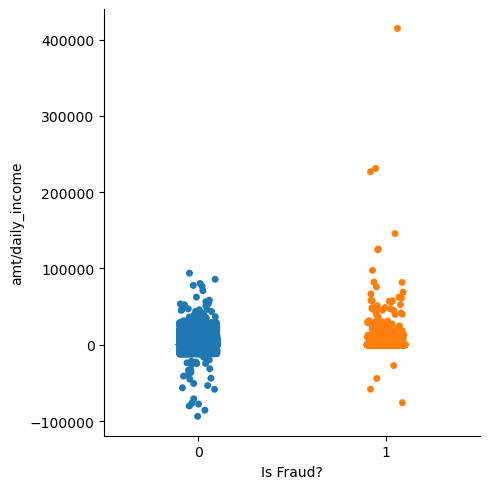

In [24]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'amt/daily_income')
plt.show()

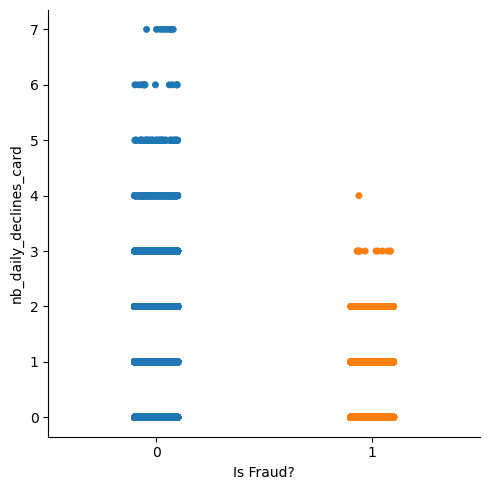

In [25]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'nb_daily_declines_card')
plt.show()

In [43]:
df_cct["insufficient_balance"].describe()

count    2.438690e+07
mean     1.001050e-02
std      9.955043e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: insufficient_balance, dtype: float64

In [26]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'insufficient_balance')
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'bad_pin')
plt.show()

In [37]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'hr_nbt/last_30d_av_hr_nbt')
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'last_18h_nbt')
plt.show()

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'last_18h_amt')
plt.show()

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'last_3d_amt/nbt')
plt.show()

In [ ]:
sns.catplot(data = df_cct, x = 'Is Fraud?', y = 'Day')
plt.show()

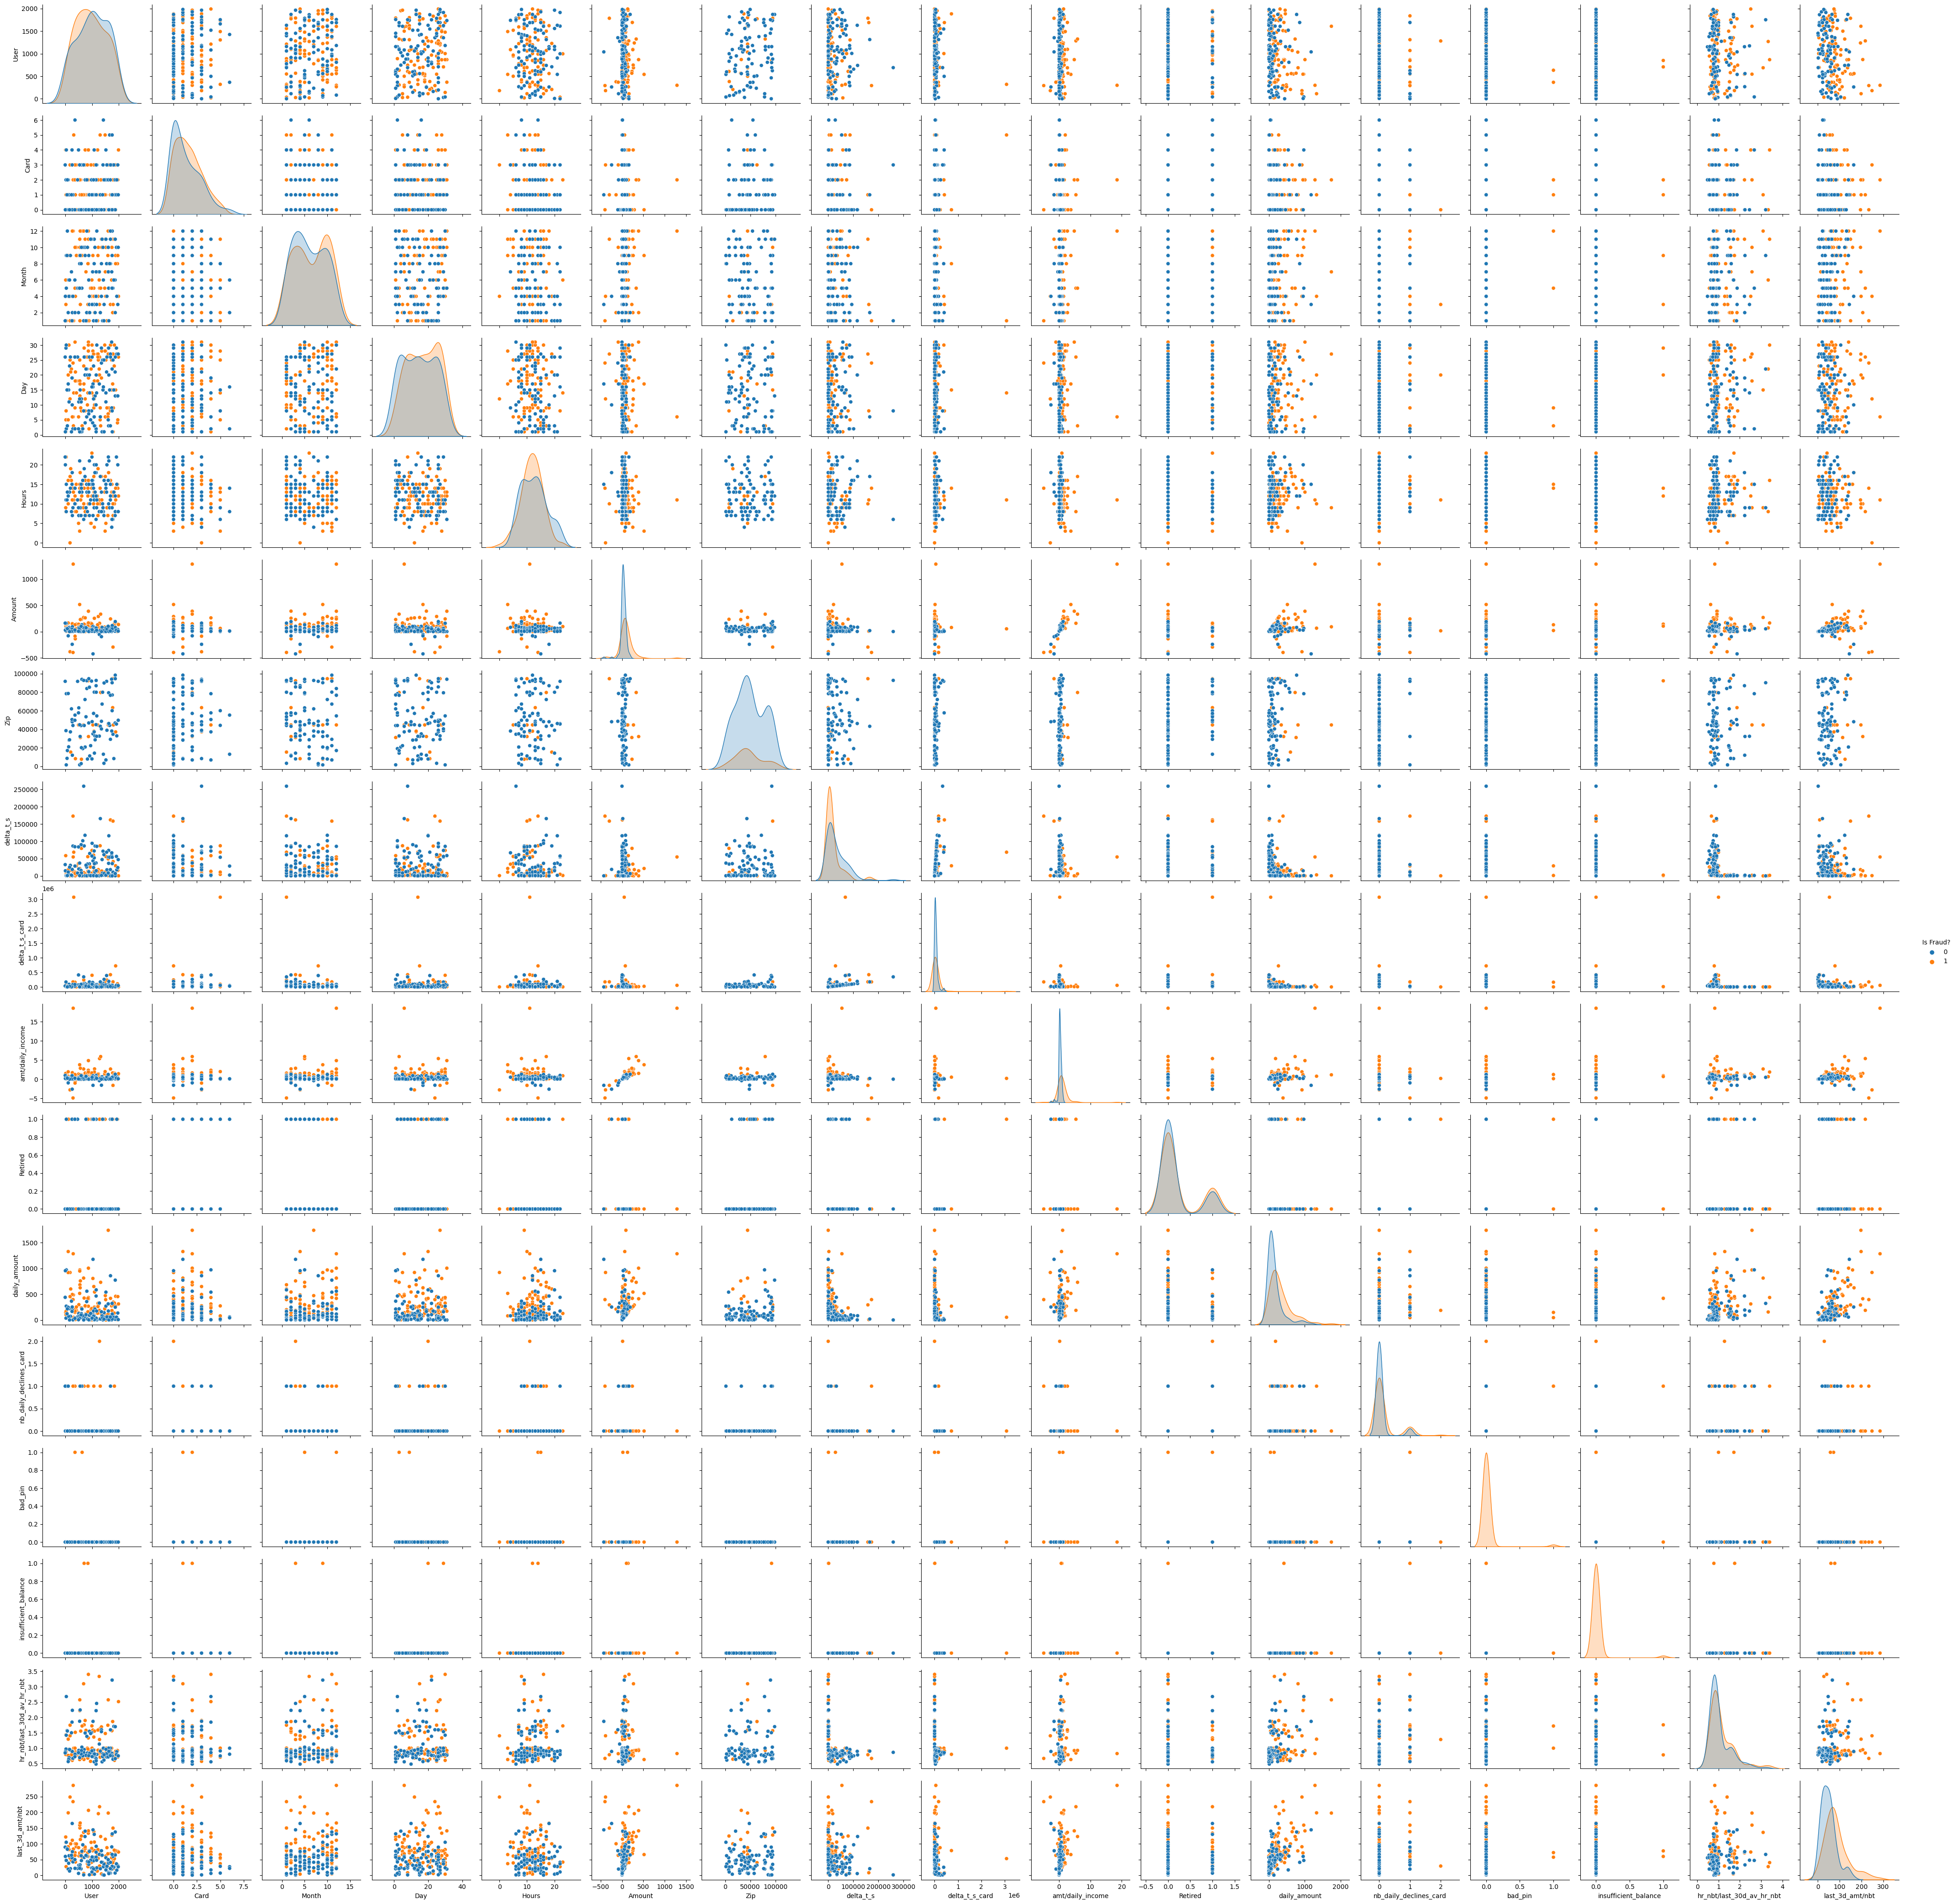

In [44]:
df=df_cct[new_var_list]
df_fraud = df[df['Is Fraud?']==1].sample(100)
df_no_fraud = df[df['Is Fraud?']==0].sample(100)
df_sample = pd.concat([df_fraud,df_no_fraud])

sns.pairplot(df_sample,hue="Is Fraud?")

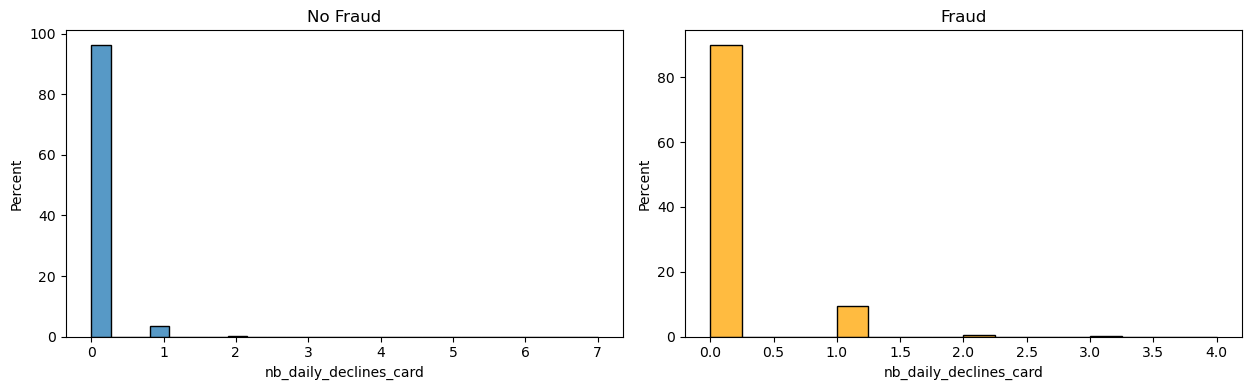

In [61]:
df_cct=df
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='nb_daily_declines_card',data=df_cct[df_cct["Is Fraud?"] == 0], stat='percent')
plt.xlabel("nb_daily_declines_card")
plt.title("No Fraud")

plt.subplot(1,4,2) 
sns.histplot(x='nb_daily_declines_card',data=df_cct[df_cct["Is Fraud?"] == 1 ],stat='percent', color = 'orange')
plt.xlabel("nb_daily_declines_card")
plt.title("Fraud")

plt.tight_layout()
plt.show()

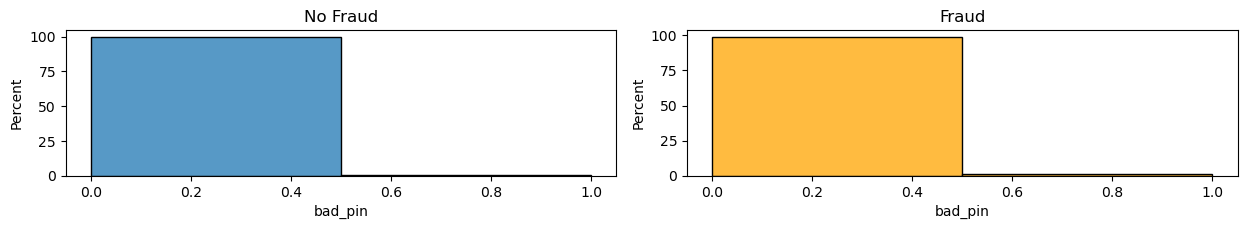

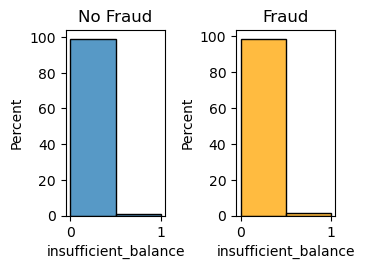

In [60]:
df_cct=df
plt.figure(figsize=(25,4))

plt.subplot(2,4,1)
sns.histplot(x='bad_pin',data=df_cct[df_cct["Is Fraud?"] == 0], bins=2,stat='percent')
plt.xlabel("bad_pin")
plt.title("No Fraud")

plt.subplot(2,4,2) 
sns.histplot(x='bad_pin',data=df_cct[df_cct["Is Fraud?"] == 1 ],bins=2,stat='percent', color = 'orange')
plt.xlabel("bad_pin")
plt.title("Fraud")

plt.tight_layout()
plt.show()

plt.subplot(2,4,3)
sns.histplot(x='insufficient_balance',data=df_cct[df_cct["Is Fraud?"] == 0],bins=2, stat='percent')
plt.xlabel("insufficient_balance")
plt.title("No Fraud")

plt.subplot(2,4,4) 
sns.histplot(x='insufficient_balance',data=df_cct[df_cct["Is Fraud?"] == 1 ],bins=2,stat='percent', color = 'orange')
plt.xlabel("insufficient_balance")
plt.title("Fraud")

plt.tight_layout()
plt.show()

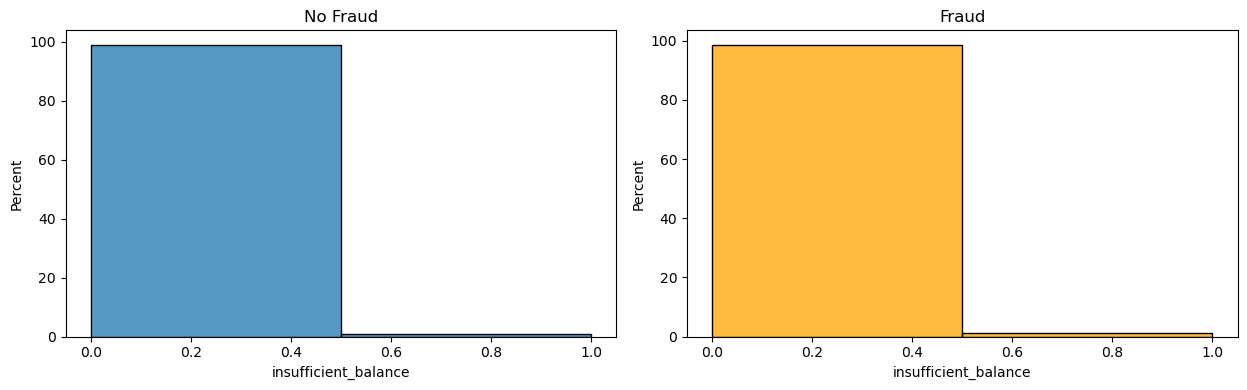

In [56]:
df_cct=df
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='insufficient_balance',data=df_cct[df_cct["Is Fraud?"] == 0],bins=2, stat='percent')
plt.xlabel("insufficient_balance")
plt.title("No Fraud")

plt.subplot(1,4,2) 
sns.histplot(x='insufficient_balance',data=df_cct[df_cct["Is Fraud?"] == 1 ],bins=2,stat='percent', color = 'orange')
plt.xlabel("insufficient_balance")
plt.title("Fraud")

plt.tight_layout()
plt.show()

In [ ]:
df_cct=df
plt.figure(figsize=(25,4))

plt.subplot(1,4,1)
sns.histplot(x='bad_pin',data=df_cct[df_cct["Is Fraud?"] == 0],bins=2, stat='percent')
plt.xlabel("bad_pin")
plt.title("No Fraud")

plt.subplot(1,4,2) 
sns.histplot(x='bad_pin',data=df_cct[df_cct["Is Fraud?"] == 1 ],stat='percent', bins=2,color = 'orange')
plt.xlabel("bad_pin")
plt.title("Fraud")

plt.tight_layout()
plt.show()

In [25]:
#Un peu de nettoyage

df_cct["Amount"] = df_cct["Amount"].str.replace("$","")
df_cct["Amount"] = df_cct["Amount"].astype(float)

AttributeError: Can only use .str accessor with string values!

NameError: name 'df_cct' is not defined

NameError: name 'df_cct' is not defined

NameError: name 'df_cct' is not defined

NameError: name 'df_cct' is not defined

NameError: name 'df_cct1' is not defined

NameError: name 'sns' is not defined